In [61]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.optimizers import SGD

import matplotlib.pyplot as plt


In [62]:
# Loading data for our model    
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [63]:
# Data inspection 
print("x_train shape: " + str(x_train.shape))
print("number of training samples: " + str(x_train.shape[0]))
print("number of training labeles: " + str(y_train.shape[0]))

x_train shape: (60000, 28, 28)
number of training samples: 60000
number of training labeles: 60000


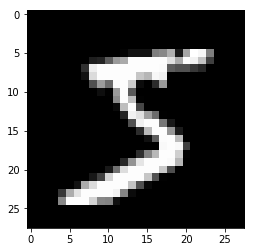

In [64]:
# ploting a single image

image = x_train[0]

plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

In [66]:
# Reshaping data to be compatible with Keras (samples, row, col, channels)
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print("train data shape: " + str(x_train.shape))
print("test data shape : " + str(x_test.shape))

# Normalizing data

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train_norm = x_train / 255
x_test_norm  = x_test / 255

train data shape: (60000, 28, 28, 1)
test data shape : (10000, 28, 28, 1)


In [67]:
# One Hot encoding the labels

y_train_hot = np_utils.to_categorical(y_train)
y_test_hot  = np_utils.to_categorical(y_test)

print(y_test_hot[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [68]:
# building models and compiling 

input_shape = (img_rows, img_cols, 1)
num_classes = y_test_hot.shape[1]

# Putting CNN together
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape ))
cnn_model.add(Conv2D(64, (3,3), activation='relu' ))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compiling Model

cnn_model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics = ['accuracy'])

print(cnn_model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [76]:
# Training the model 
batch_size = 32
epochs = 5

history = cnn_model.fit(x_train_norm, y_train_hot,
                    batch_size= batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test_norm, y_test_hot))

score = cnn_model.evaluate(x_test_norm, y_test_hot, verbose=0)



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 170s 3ms/step - loss: 0.2303 - acc: 0.9321 - val_loss: 0.1057 - val_acc: 0.9682
Epoch 2/5
60000/60000 [==============================] - 185s 3ms/step - loss: 0.1809 - acc: 0.9459 - val_loss: 0.0843 - val_acc: 0.9743
Epoch 3/5
60000/60000 [==============================] - 174s 3ms/step - loss: 0.1500 - acc: 0.9564 - val_loss: 0.0703 - val_acc: 0.9777
Epoch 4/5
60000/60000 [==============================] - 180s 3ms/step - loss: 0.1287 - acc: 0.9610 - val_loss: 0.0632 - val_acc: 0.9800
Epoch 5/5
60000/60000 [==============================] - 166s 3ms/step - loss: 0.1138 - acc: 0.9659 - val_loss: 0.0564 - val_acc: 0.9814


In [77]:
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

('Test Loss: ', 0.05638150505949743)
('Test Accuracy: ', 0.9814)


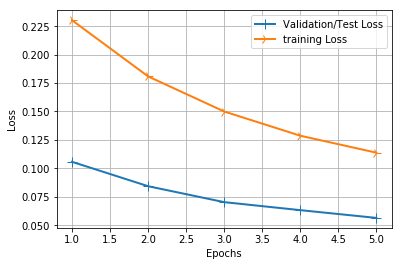

In [78]:
# Plotting LOSS and ACCURACY after training the model

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
train_epochs = range(1, len(loss_values)+ 1)

line1 = plt.plot(train_epochs, val_loss_values, label="Validation/Test Loss")
line2 = plt.plot(train_epochs, loss_values, label= "training Loss" )

plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


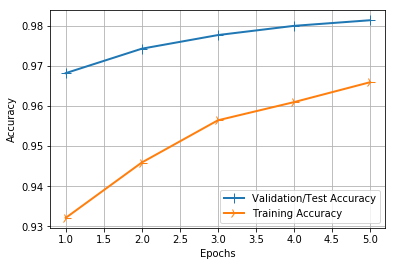

In [79]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

train_epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(train_epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(train_epochs, acc_values, label='Training Accuracy')

plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [83]:
# Saving the model
import h5py
cnn_model.save("./trained_models/01_model_cnn_mnist_epochs_05.h5")
print("Model saved")

Model saved


In [86]:
# import model

from keras.models import load_model

model_ = load_model("./trained_models/01_model_cnn_mnist_epochs_05.h5")

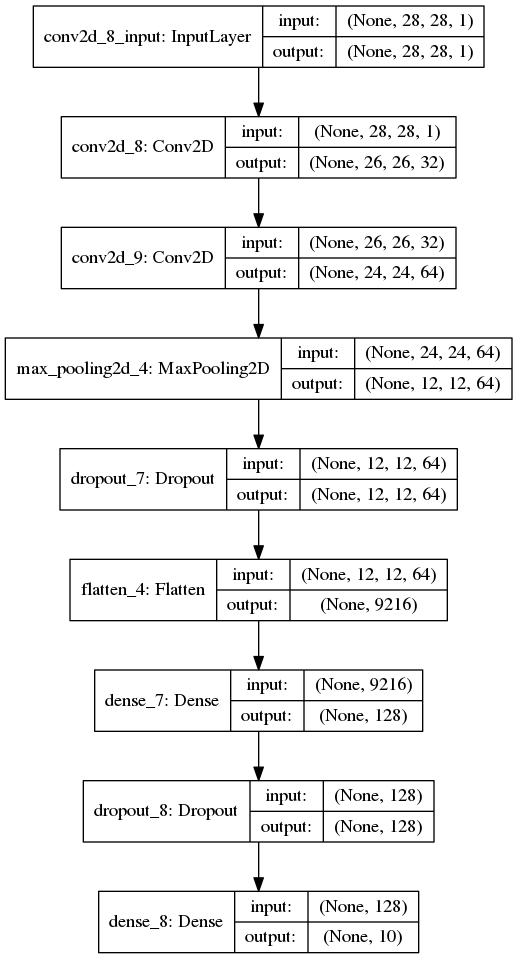

In [147]:
# Drawing the model

from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg
plot_model(model_, to_file="./trained_models/01_model_cnn_mnist.png",
           show_shapes=True,
           show_layer_names=True)


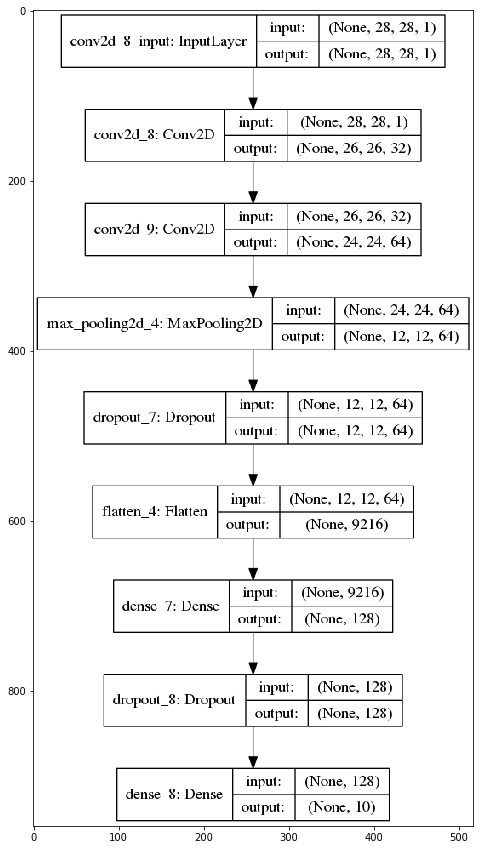

In [151]:
# Optional alternative way 
img = mpimg.imread('./trained_models/01_model_cnn_mnist.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img)